# Regression and Classification

## 1. Moore's Law
Use the scripts from here to download a large amount of data relating to CPU specs. The scripts might take as long as an hour, depending on your connection speed. (Pay attention to the line "If you want to skip the steps in this section, you can simply download the aggregated result files from http://preshing.com/files/specdata20120207.zip and extract them to this folder." This will be faster and save you some troubles while providing the same dataset.)

In [6]:
import pandas as pd
import numpy as np

benchmark = pd.read_csv ('/Users/swimmingcircle/cs156_code/assignments/assignment_1/specdata20120207/benchmarks.csv')
summary = pd.read_csv ('/Users/swimmingcircle/cs156_code/assignments/assignment_1/specdata20120207/summaries.csv')

/Users/swimmingcircle/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [7]:
benchmark.info(), benchmark.shape, benchmark.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136995 entries, 0 to 136994
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   testID     136995 non-null  object 
 1   benchName  136995 non-null  object 
 2   base       136995 non-null  float64
 3   peak       131575 non-null  object 
dtypes: float64(1), object(3)
memory usage: 4.2+ MB


(None,
 (136995, 4),
                  testID    benchName   base  peak
 0  cpu95-19990104-03254  101.tomcatv  19.40  27.1
 1  cpu95-19990104-03254     102.swim  27.20  34.8
 2  cpu95-19990104-03254   103.su2cor  10.10  9.98
 3  cpu95-19990104-03254  104.hydro2d   8.58  8.61
 4  cpu95-19990104-03254    107.mgrid   8.94  9.44)

In [8]:
summary.info(), summary.shape, summary.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10155 entries, 0 to 10154
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   testID        10155 non-null  object 
 1   tester        10155 non-null  object 
 2   machine       8982 non-null   object 
 3   cpu           10155 non-null  object 
 4   mhz           10155 non-null  float64
 5   hwAvail       10155 non-null  object 
 6   os            10155 non-null  object 
 7   compiler      10155 non-null  object 
 8   autoParallel  10155 non-null  object 
 9   benchType     10155 non-null  object 
 10  base          10155 non-null  float64
 11  peak          10155 non-null  object 
dtypes: float64(2), object(10)
memory usage: 952.2+ KB


(None,
 (10155, 12),
                  testID            tester                             machine  \
 0  cpu95-19990104-03254              Dell  Precision WorkStation 610 (450MHz)   
 1  cpu95-19990104-03256              Dell  Precision WorkStation 610 (450MHz)   
 2  cpu95-19990118-03257  Siemens, Germany                        CELSIUS 2000   
 3  cpu95-19990118-03258  Siemens, Germany                        CELSIUS 2000   
 4  cpu95-19990122-03268    Sun, Palo Alto                 Sun Enterprise 3500   
 
                                  cpu    mhz   hwAvail  \
 0            450 MHz Pentium II XEON  450.0  Jan-1999   
 1            450 MHz Pentium II XEON  450.0  Jan-1999   
 2  Pentium II Xeon Processor 450 MHz  450.0  Nov-1998   
 3  Pentium II Xeon Processor 450 MHz  450.0  Nov-1998   
 4               400MHz UltraSPARC II  400.0  Dec-1998   
 
                                  os  \
 0      Microsoft Windows NT 4.0 sp3   
 1      Microsoft Windows NT 4.0 sp3   
 2  Windows NT 

1. Extract the date and base speed for a benchmark of your choice. Note that the dates contained as part of the testID don't tell us about when the hardware was actually designed, so the test could have been run at a much later date using older hardware. We therefore need the date indicating when the hardware was first available (hwAvail) from the summaries file to really test Moore's Law.

#### Join dataframe benchmark and summary on test id

In [9]:
df = pd.merge(benchmark, summary[['testID','hwAvail']], on='testID')

In [10]:
#convert first available time to datatime 
df['hwAvail'] = pd.to_datetime(df['hwAvail'])
df['time_delta'] = (df['hwAvail'] - df['hwAvail'].min()) /np.timedelta64(1,'D')
df.head()

,testID,benchName,base,peak,hwAvail,time_delta
0,cpu95-19990104-03254,101.tomcatv,19.40,27.1,1999-01-01,2863.0
1,cpu95-19990104-03254,102.swim,27.20,34.8,1999-01-01,2863.0
2,cpu95-19990104-03254,103.su2cor,10.10,9.98,1999-01-01,2863.0
3,cpu95-19990104-03254,104.hydro2d,8.58,8.61,1999-01-01,2863.0
4,cpu95-19990104-03254,107.mgrid,8.94,9.44,1999-01-01,2863.0


In [11]:
#transform base to log scale 
df['log_base'] = np.log(df['base'])

#Choose 101.tomcatv as benchmark
tomcatv = df[df['benchName'] == '101.tomcatv']
tomcatv

,testID,benchName,base,peak,hwAvail,time_delta,log_base
0,cpu95-19990104-03254,101.tomcatv,19.40,27.1,1999-01-01,2863.0,2.965273
26,cpu95-19990118-03258,101.tomcatv,19.50,27.5,1998-11-01,2802.0,2.970414
44,cpu95-19990122-03281,101.tomcatv,35.30,37.1,1998-12-01,2832.0,3.563883
54,cpu95-19990122-03282,101.tomcatv,43.00,49.8,1998-12-01,2832.0,3.761200
64,cpu95-19990122-03283,101.tomcatv,63.90,75.0,1998-12-01,2832.0,4.157319
...,...,...,...,...,...,...,...
9900,p074,101.tomcatv,3.40,4.66,1995-06-01,1553.0,1.223775
9910,p075,101.tomcatv,7.34,8.89,1995-11-01,1706.0,1.993339
9920,p076,101.tomcatv,8.46,9.86,1996-03-01,1827.0,2.135349
9930,p077,101.tomcatv,9.45,11.0,1996-03-01,1827.0,2.246015


Plot the data in a semi-log plot

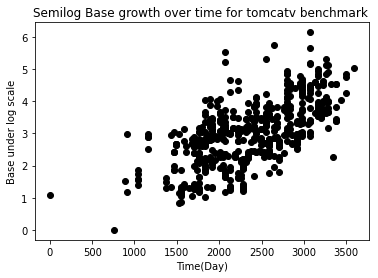

In [12]:
import matplotlib.pyplot as plt

import numpy as np

# Linear X axis, Logarithmic Y axis
plt.plot(tomcatv['time_delta'], tomcatv['log_base'], 'o', color='black');
 

# Provide the title for the semilog plot
plt.title('Semilog Base growth over time for tomcatv benchmark ')
 

# Give x axis label for the semilog plot
plt.xlabel('Time(Day)')

 

# Give y axis label for the semilog plot
plt.ylabel('Base under log scale')

# Display the semilog plot
plt.show()

Now train a linear model to fit your plot.

In [13]:
from sklearn.linear_model import LinearRegression
from numpy import array

x = array(tomcatv['time_delta'])
x = x.reshape(-1,1)
y = tomcatv['log_base']

lr = LinearRegression()
lr.fit(x, tomcatv['log_base'])
y_pred = lr.predict(x)

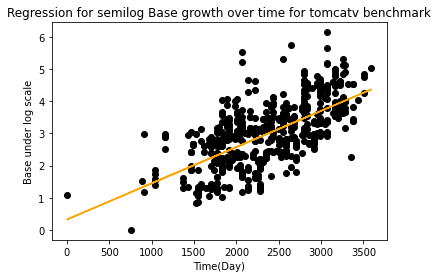

In [14]:
#plot our regression model 
plt.title('Semilog Base growth over time for tomcatv benchmark ')
plt.title('Regression for semilog Base growth over time for tomcatv benchmark')
plt.plot(tomcatv['time_delta'], y, 'o', color='black');
plt.plot(tomcatv['time_delta'],y_pred  ,color='orange')
# Give x axis label for the semilog plot
plt.xlabel('Time(Day)')
# Give y axis label for the semilog plot
plt.ylabel('Base under log scale')
plt.show()

In [15]:
coeff_parameter = pd.DataFrame(lr.coef_, ['time_delta'],columns=['Coefficient'])
coeff_parameter.loc['intercept', :] = lr.intercept_
coeff_parameter

,Coefficient
time_delta,0.001126
intercept,0.322525


In [16]:
from sklearn.metrics import mean_squared_error, r2_score

# The mean squared error
print(f'Mean squared error: {round(mean_squared_error(y, y_pred),2)}')
# R-squared: 
print(f'R-squared: {round(r2_score(y, y_pred), 4)}, meaning that around {round(r2_score(y, y_pred)*100,2)}% of the variance in data can be explained by our model.')

Mean squared error: 0.58
R-squared: 0.422, meaning that around 42.2% of the variance in data can be explained by our model.


How well is Moore’s law holding up?

In Moore's Law, the base should ideally increase at a rate of roughly a factor of two per year. Since, we transform the base into log scale, a linear regression should be able to predict the log base if Moore's Law holds. Through r-square, we observe that our model can roughly explain 50% of the variance for tomcatv benchmark, meaning that Moore's law hold to a certain extent but a lot of variances still exist. We can observe the same result from our Regression for semilog Base growth over time for tomcatv benchmark graph as well. 

## 2. MNIST Digits

No machine learning course would be complete without using the MNIST dataset. This dataset was a hugely influential dataset of handwritten digits (0-9).

http://scikit-learn.org/stable/tutorial/basic/tutorial.html

Using Scikit.learn, load the MNIST digits (See here: http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits).
Plot some of the examples.
Choose two digit classes (e.g 7s and 3s) , and train a k-nearest neighbor classifier.
Report your error rates on a held out part of the data.
(Optional) Test your model on the full dataset (available from http://yann.lecun.com/exdb/mnist/)

In [17]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)

(1797, 64)


Plot some of the examples.

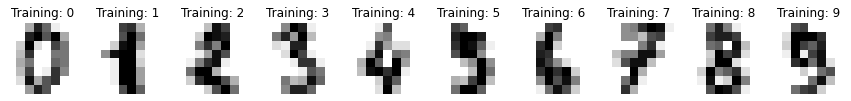

In [18]:
import matplotlib.pyplot as plt
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(15, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

Choose two digit classes (e.g. 7s and 3s), and train a k-nearest neighbor classifier.

In [19]:
import numpy as np
import pandas as pd
import pprint
from sklearn.datasets import load_digits
from IPython.display import display, HTML
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
X = digits.data 
y = digits.target #from 0 till 9 digits 
trainData,testData,trainLabel,testLabel = train_test_split(X, y, test_size=0.25, random_state=123)

print(X.shape, y.shape)
print(y)

(1797, 64) (1797,)
[0 1 2 ... 8 9 8]


In [20]:
#Count the number of occurances
from collections import Counter
Counter(y)

Counter({0: 178,
         1: 182,
         2: 177,
         3: 183,
         4: 181,
         5: 182,
         6: 181,
         7: 179,
         8: 174,
         9: 180})

In [21]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [22]:
#Choose 8 and 3 as the digit cases 
index = []

for i in range(len(y)):
    if y[i] == 3 or y[i] == 8: 
        index.append(i)
new_x = X[index]
new_y = y[index]

#### Choose the optimal k for KNN model 

Minimum error: 0.005714285714285714 at K = 1


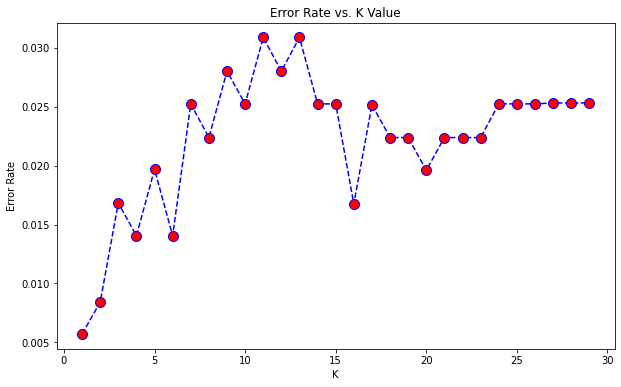

In [23]:
from sklearn.model_selection import KFold

error_rate = []
N= 30

# Using k-fold crossing Validation
cv = KFold(n_splits=10)

acuracy_ = []
k_=[]


for i in range(1,N):
    score = []
    for train_index, test_index in cv.split(new_x, new_y):
        X_train, X_test = new_x[train_index], new_x[test_index]
        Y_train, Y_test = new_y[train_index], new_y[test_index]
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train,Y_train)
        pred_i = knn.predict(X_test)
        score.append(np.mean(pred_i != Y_test)) 
        #score for error rate = # of data point in the wrong group / # of total data points 
    error_rate.append(np.mean(score))
        

plt.figure(figsize=(10,6))
plt.plot(range(1,N),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

From the error rate graph, we choose K = 1 since it has the lowest error rate around 0.5%.

In [24]:
trainData,testData,trainLabel,testLabel = train_test_split(new_x, new_y, test_size=0.25, random_state=123)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(trainData,trainLabel)
predictions = knn.predict(testData)
print(classification_report(testLabel,predictions))


              precision    recall  f1-score   support

           3       1.00      0.98      0.99        48
           8       0.98      1.00      0.99        42

    accuracy                           0.99        90
   macro avg       0.99      0.99      0.99        90
weighted avg       0.99      0.99      0.99        90



Report your error rates on a held out part of the data.

- accuracy = (# classified correct) / (# classified total)
- error rate = 1 - accuracy 

For digit 3 and 8: 
- error rate = 1 - accuracy = 1- 0.99 = 0.01

If we look at 3 and 8 respectively, we will see that recall for 3 is 0.98, indicating that some of the 3 hasn't been captured. Looking at the presicion for 8, it shows that some 3 is captured as 8. 

In [26]:
import gzip

def read_images(filepath):
    with gzip.open(filepath, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of images
        image_count = int.from_bytes(f.read(4), 'big')
        # third 4 bytes is the row count
        row_count = int.from_bytes(f.read(4), 'big')
        # fourth 4 bytes is the column count
        column_count = int.from_bytes(f.read(4), 'big')
        # rest is the image pixel data, each pixel is stored as an unsigned byte
        # pixel values are 0 to 255
        image_data = f.read()
        images = np.frombuffer(image_data, dtype=np.uint8)\
            .reshape((image_count, row_count, column_count))
        return images

train_digits = read_images('/Users/swimmingcircle/cs156_code/assignments/assignment_1/digit_dataset/train-images-idx3-ubyte.gz')
test_digits = read_images('/Users/swimmingcircle/cs156_code/assignments/assignment_1/digit_dataset/t10k-images-idx3-ubyte.gz')

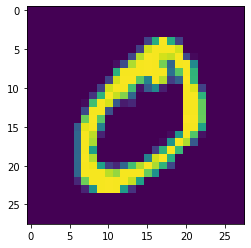

In [27]:
import matplotlib.pyplot as plt
image = np.asarray(train_digits[1]).squeeze()
plt.imshow(image)
plt.show()

In [28]:
def read_labels(filepath):
    with gzip.open(filepath, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of labels
        label_count = int.from_bytes(f.read(4), 'big')
        # rest is the label data, each label is stored as unsigned byte
        # label values are 0 to 9
        label_data = f.read()
        labels = np.frombuffer(label_data, dtype=np.uint8)
        return labels

train_labels = read_labels('/Users/swimmingcircle/cs156_code/assignments/assignment_1/digit_dataset/train-labels-idx1-ubyte.gz')
test_labels = read_labels('/Users/swimmingcircle/cs156_code/assignments/assignment_1/digit_dataset/t10k-labels-idx1-ubyte.gz')

In [29]:
#Reshape the data into similar format as we have done above
train_digits = train_digits.reshape(60000, 784)
test_digits = test_digits.reshape(10000, 784)

In [30]:
#Choose 8 and 3 as the digit cases 
index = []

for i in range(len(train_labels)):
    if train_labels[i] == 3 or train_labels[i] == 8: 
        index.append(i)
train_x = train_digits[index]
train_y = train_labels[index]

Minimum error: 0.011767736330080297 at K = 3


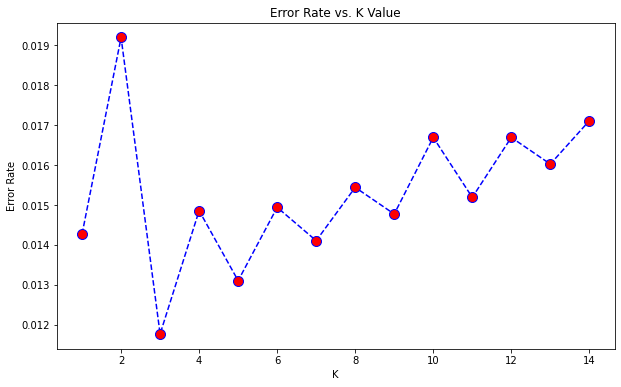

In [31]:
from sklearn.model_selection import KFold
from tqdm import tqdm

error_rate = []
N= 15

# Using k-fold crossing Validation
cv = KFold(n_splits=10)

acuracy_ = []
k_=[]

for i in range(1,N):
    score = []
    for train_index, test_index in cv.split(train_x, train_y):
        X_train, X_test = train_x[train_index], train_x[test_index]
        Y_train, Y_test = train_y[train_index], train_y[test_index]
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train,Y_train)
        pred_i = knn.predict(X_test)
        score.append(np.mean(pred_i != Y_test)) 
        #score for error rate = # of data point in the wrong group / # of total data points 
    error_rate.append(np.mean(score))
        
plt.figure(figsize=(10,6))
plt.plot(range(1,N),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

From the error rate graph, we choose K = 3 since it has the lowest error rate around 1%. 

In [32]:
#Find 3 and 8 from test data
index = []
for i in range(len(test_labels)):
    if test_labels[i] == 3 or test_labels[i] == 8: 
        index.append(i)
test_x = test_digits[index]
test_y = test_labels[index]

In [33]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_x,train_y)
predictions = knn.predict(test_x)
print(classification_report(test_y,predictions))


              precision    recall  f1-score   support

           3       0.98      1.00      0.99      1010
           8       1.00      0.98      0.99       974

    accuracy                           0.99      1984
   macro avg       0.99      0.99      0.99      1984
weighted avg       0.99      0.99      0.99      1984



The overall accuracy is 0.99. If we look at 3 and 8 respectively, we will see that recall for 8 is 0.98, indicating that some of the 8 hasn't been captured. Looking at the presicion for 3, it shows that some 8 is captured as 3. 

- Resources: 
  - Preclass workbook
  - How to find the optimal value of K in KNN?
: https://towardsdatascience.com/how-to-find-the-optimal-value-of-k-in-knn-35d936e554eb
  - Read and show MNIST data
: https://www.kaggle.com/n4srin/read-and-show-mnist-data
